In [2]:
pip install wordcloud

     |████████████████████████████████| 365 kB 1.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

In [2]:
awarness = pd.read_excel('awarness_blog&cafe.xlsx')
awarness

,all_text
0,서울 각 구별 자동차 브랜드와 비교*부동산스터디 게시판 운영가이드\nhttps://...
1,픽업트럭 시장도 '후끈'…한국지엠 콜로라도로 도전장픽업트럭 시장도 '후끈'…한국지엠...
2,현대차가 해결했다..성능 업그레이드 OTA 불법현대차가 해결했다..성능 업그레이드 ...
3,"자동차 헤드램프 습기,고장인가요?차량을 운행하다보면 차량 내부나 외부에 \n습기가 ..."
4,1986 Chevrolet Caprice Brougham1986 쉐보레 카프리스 브...
...,...
11159,자율 주행 자동차를 대상으로 한 위험 분석 및 Risk 평가 방안 1ADAS 능동형...
11160,nan입력 20200702 0753 미국의 전기자동차 기업인 테슬라가 시가총액 세계...
11161,대형 마트 주차장을 자동차 영화관으로 쓴다면코로나 바이러스 감염증19코로나19 확산...
11162,이번달부터는 운전자가 운전대를 잡지 않아도이번달부터는 운전자가 운전대를 잡지 않아도...


In [6]:
awarness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   all_text  11164 non-null  object
dtypes: object(1)
memory usage: 87.3+ KB


In [7]:
print(awarness.shape)
awarness.dropna()
print(awarness.shape)

(11164, 1)
(11164, 1)


In [8]:
awarn_length = awarness['all_text'].astype(str).apply(len)
awarn_length

0         666
1        1268
2        1908
3        1283
4         359
         ... 
11159    3119
11160     779
11161    1294
11162    1585
11163    2903
Name: all_text, Length: 11164, dtype: int64

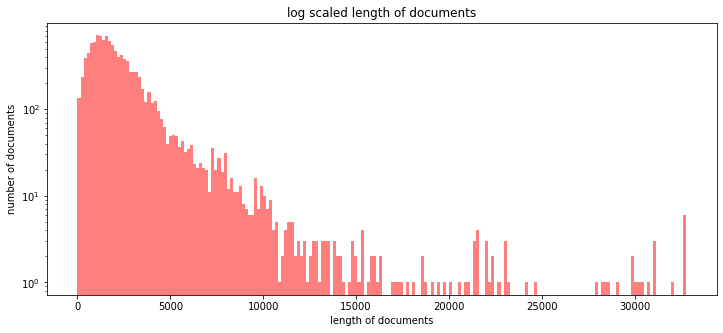

In [9]:
plt.figure(figsize=(12, 5))

plt.hist(awarn_length, bins=200, alpha=0.5, color='r', label='words')
plt.yscale('log', nonpositive='clip')

plt.title('log scaled length of documents')

plt.xlabel('length of documents')
plt.ylabel('number of documents')

plt.show()

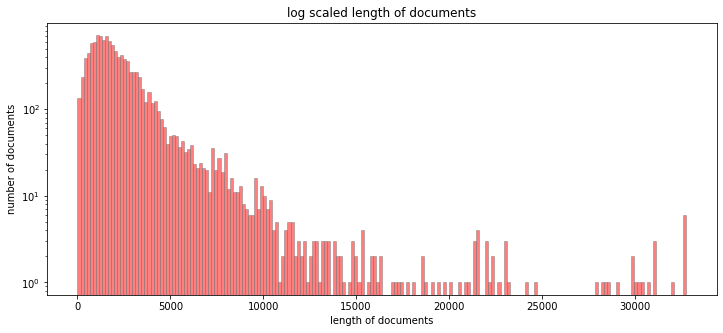

In [10]:
plt.figure(figsize=(12, 5))

plt.hist(awarn_length, bins=200, alpha=0.5, color='r', label='words', ec='grey')
plt.yscale('log', nonpositive='clip')

plt.title('log scaled length of documents')

plt.xlabel('length of documents')
plt.ylabel('number of documents')

plt.show()

In [14]:
print('최댓값 :{}'.format(np.max(awarn_length)))
print('최솟값 :{}'.format(np.min(awarn_length)))
print('평균값 :{:.2f}'.format(np.mean(awarn_length)))
print('표준편차 :{:.2f}'.format(np.std(awarn_length)))
print('중간값 :{}'.format(np.median(awarn_length)))
print('제1사분위 :{}'.format(np.percentile(awarn_length, 25)))
print('제3사분위 :{}'.format(np.percentile(awarn_length, 75)))

최댓값 :32767
최솟값 :5
평균값 :2376.73
표준편차 :2497.75
중간값 :1775.5
제1사분위 :1087.0
제3사분위 :2843.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f137b643b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f137b643ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f137b679c18>],
 'medians': [<matplotlib.lines.Line2D at 0x7f137ba5fa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f137bae0cf8>],
 'means': [<matplotlib.lines.Line2D at 0x7f137b6ce940>]}

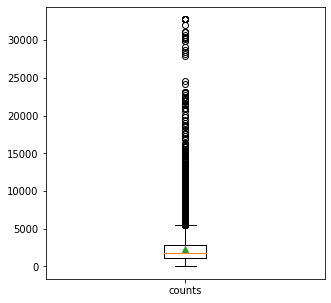

In [13]:
plt.figure(figsize=(5,5))

plt.boxplot(awarn_length,
           labels=['counts'],
           showmeans=True)

In [18]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: chmod 0700 of directory /var/lib/apt/lists/partial failed - SetupAPTPartialDirectory (1: Operation not permitted)
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


# 워드클라우드는 코랩

In [3]:
awarn_word_counts = awarness['all_text'].astype(str).apply(lambda x:len(x.split(' ')))
awarn_word_counts

0        123
1        238
2        425
3        180
4         57
        ... 
11159    720
11160    171
11161    315
11162    343
11163    702
Name: all_text, Length: 11164, dtype: int64

Text(0, 0.5, 'number of documents')

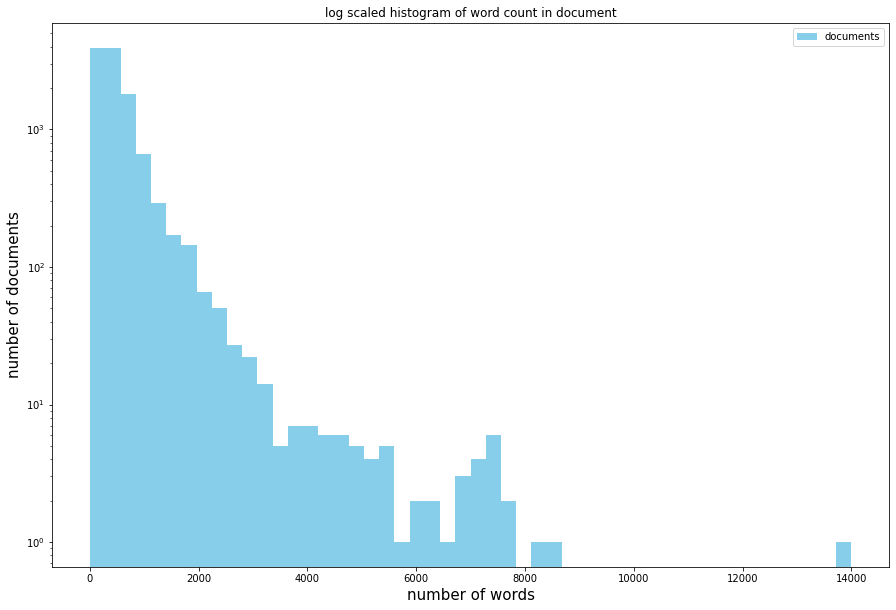

In [4]:
plt.figure(figsize=(15,10))
plt.hist(awarn_word_counts, bins=50, facecolor='skyblue', label='documents')
plt.title('log scaled histogram of word count in document')
plt.yscale('log',nonpositive='clip')
plt.legend()
plt.xlabel('number of words', fontsize=15)
plt.ylabel('number of documents', fontsize=15)

Text(0, 0.5, 'number of documents')

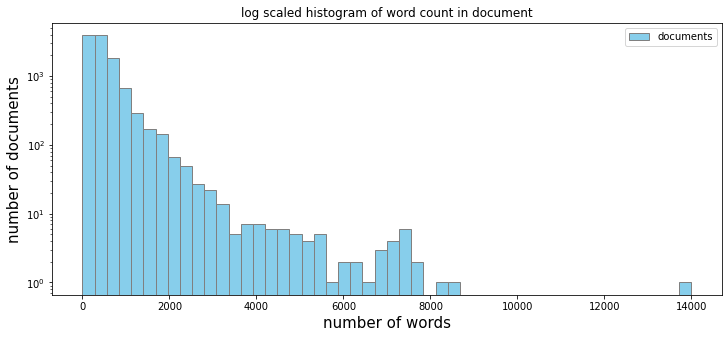

In [14]:
plt.figure(figsize=(12,5))
plt.hist(awarn_word_counts, bins=50, facecolor='skyblue', label='documents', ec='grey')
plt.title('log scaled histogram of word count in document')
plt.yscale('log',nonpositive='clip')
plt.legend()
plt.xlabel('number of words', fontsize=15)
plt.ylabel('number of documents', fontsize=15)

In [22]:
print('최댓값 :{}'.format(np.max(awarn_word_counts)))
print('최솟값 :{}'.format(np.min(awarn_word_counts)))
print('평균값 :{:.2f}'.format(np.mean(awarn_word_counts)))
print('표준편차 :{:.2f}'.format(np.std(awarn_word_counts)))
print('중간값 :{}'.format(np.median(awarn_word_counts)))
print('제1사분위 :{}'.format(np.percentile(awarn_word_counts, 25)))
print('제3사분위 :{}'.format(np.percentile(awarn_word_counts, 75)))

최댓값 :13995
최솟값 :2
평균값 :522.73
표준편차 :590.26
중간값 :380.0
제1사분위 :223.0
제3사분위 :619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f137c1460f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f137c146c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f137c1460b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f137c146080>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f137c17c7b8>],
 'means': [<matplotlib.lines.Line2D at 0x7f137c17c5f8>]}

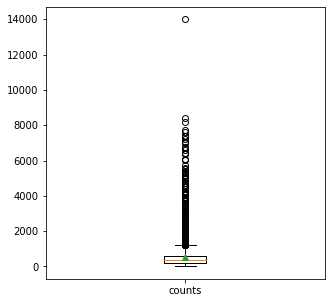

In [12]:
plt.figure(figsize=(5,5))

plt.boxplot(awarn_word_counts,
           labels=['counts'],
           showmeans=True)